# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Michael Ossama

ID: 58-6295

Tutorial: T01

---

Name: Adam Samir

ID:55-3473

Tutorial: T01

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |



## Importing Libraries \& Dataset


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/Summer2025/refs/heads/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [30]:
print("Shape:", df.shape)
df.info()
df.describe()

Shape: (46578, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  sellingprice  46578 non-null  object 
 14  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 5.3+ MB


,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [31]:
df['sellingprice'] = df['sellingprice'].replace('[\$,]', '', regex=True)
df['sellingprice'] = pd.to_numeric(df['sellingprice'], errors='coerce')
df['odometer'] = df['odometer'].str.replace('mi', '', regex=False)
df['odometer'] = df['odometer'].str.replace(',', '', regex=False)
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')

df = df[(df['sellingprice'] > 100) & (df['odometer'] > 0)].copy()
def simplify_body_type(body):
    if pd.isnull(body):
        return 'Other'
    body = body.lower()
    if 'sedan' in body:
        return 'Sedan'
    if 'coupe' in body:
        return 'Coupe'
    if 'convertible' in body:
        return 'Convertible'
    if 'hatchback' in body:
        return 'Hatchback'
    if 'suv' in body:
        return 'SUV'
    if 'minivan' in body or 'van' in body:
        return 'Minivan'
    if 'wagon' in body:
        return 'Wagon'
    if 'pickup' in body or 'cab' in body:
        return 'Pickup Truck'
    else:
        return 'Other'

df['body_type'] = df['body'].apply(simplify_body_type)
df.drop(['vin', 'trim', 'interior', 'seller', 'saledate'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,year,make,model,body,transmission,state,condition,odometer,color,sellingprice,body_type
0,2013,Hyundai,Sonata,sedan,automatic,ma,3.9,50404.0,black,10900,Sedan
1,2014,Toyota,4Runner,SUV,automatic,fl,4.9,17846.0,gray,29900,SUV
2,2012,Lexus,IS 250,Sedan,automatic,fl,4.1,21122.0,silver,24200,Sedan
3,2002,BMW,X5,SUV,automatic,fl,1.9,145303.0,black,3200,SUV
4,2014,Ford,E-Series Van,E-Series Van,automatic,wa,4.9,6714.0,white,22100,Minivan


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='color', ylabel='count'>

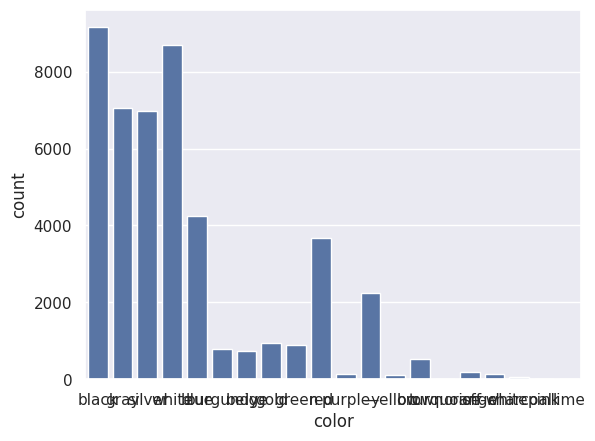

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

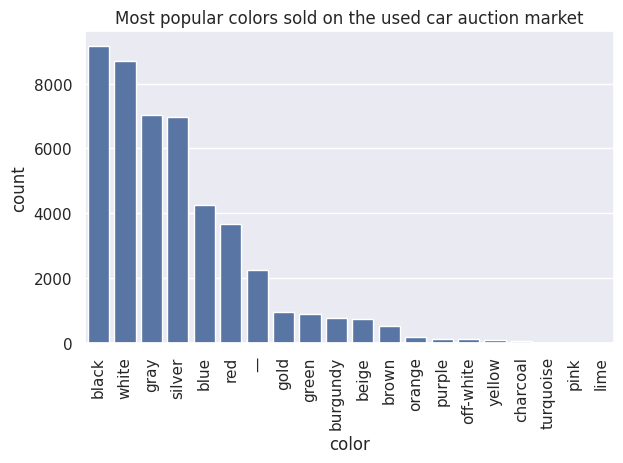

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

/tmp/ipython-input-32-1775363003.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='make', data=df, order=top_brands.index[:10], palette='viridis')


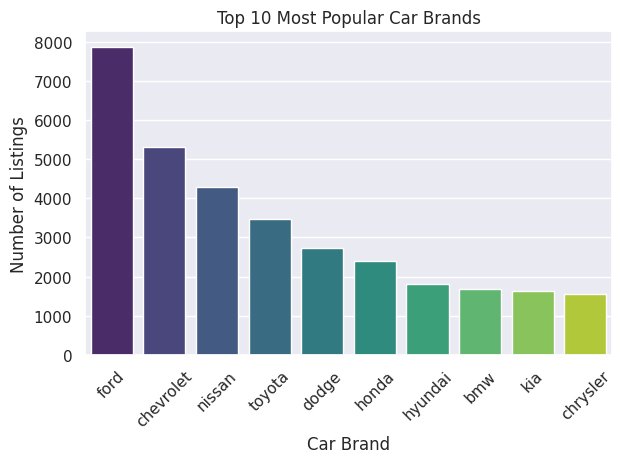

Most popular car brands:
make
ford         7871
chevrolet    5322
nissan       4297
toyota       3474
dodge        2718
honda        2403
hyundai      1801
bmw          1680
kia          1639
chrysler     1566
Name: count, dtype: int64


In [32]:
df['make'] = df['make'].astype(str).str.strip().str.lower()
top_brands = df['make'].value_counts()
sns.countplot(x='make', data=df, order=top_brands.index[:10], palette='viridis')
plt.title('Top 10 Most Popular Car Brands')
plt.xlabel('Car Brand')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("Most popular car brands:")
print(top_brands.head(10))

**Answer for Q1**: Ford, Chevrolet, Nissan

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

/tmp/ipython-input-34-3258891856.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='transmission', y='sellingprice', estimator='mean', palette='Set2')


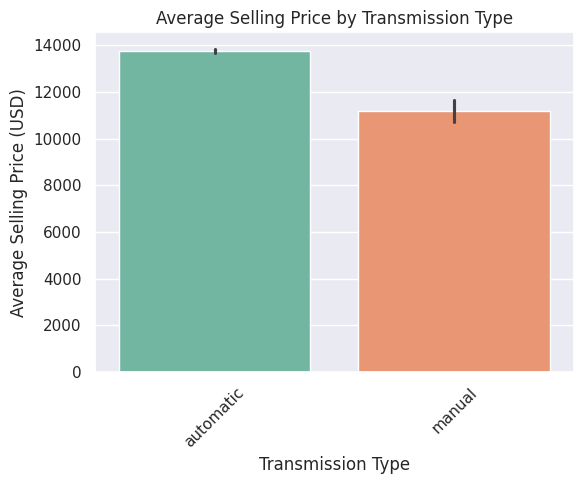

,sellingprice
transmission,
automatic,13761.075476
manual,11181.775758


In [34]:
df['transmission'] = df['transmission'].astype(str).str.strip().str.lower()
plt.figure(figsize=(6, 5))
sns.barplot(data=df, x='transmission', y='sellingprice', estimator='mean', palette='Set2')
plt.title('Average Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Selling Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
df.groupby('transmission')['sellingprice'].mean().sort_values(ascending=False)

**Answer for Q2**:

According to the bar plot and group analysis, automatic cars have an average selling price of 13761.07 USD, while manual cars have an average price of 11181.77 USD, so this means that automatic cars sell for a higher price on average.

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

/tmp/ipython-input-18-3195433906.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_makes, x='make', y='sellingprice', palette='Set3')


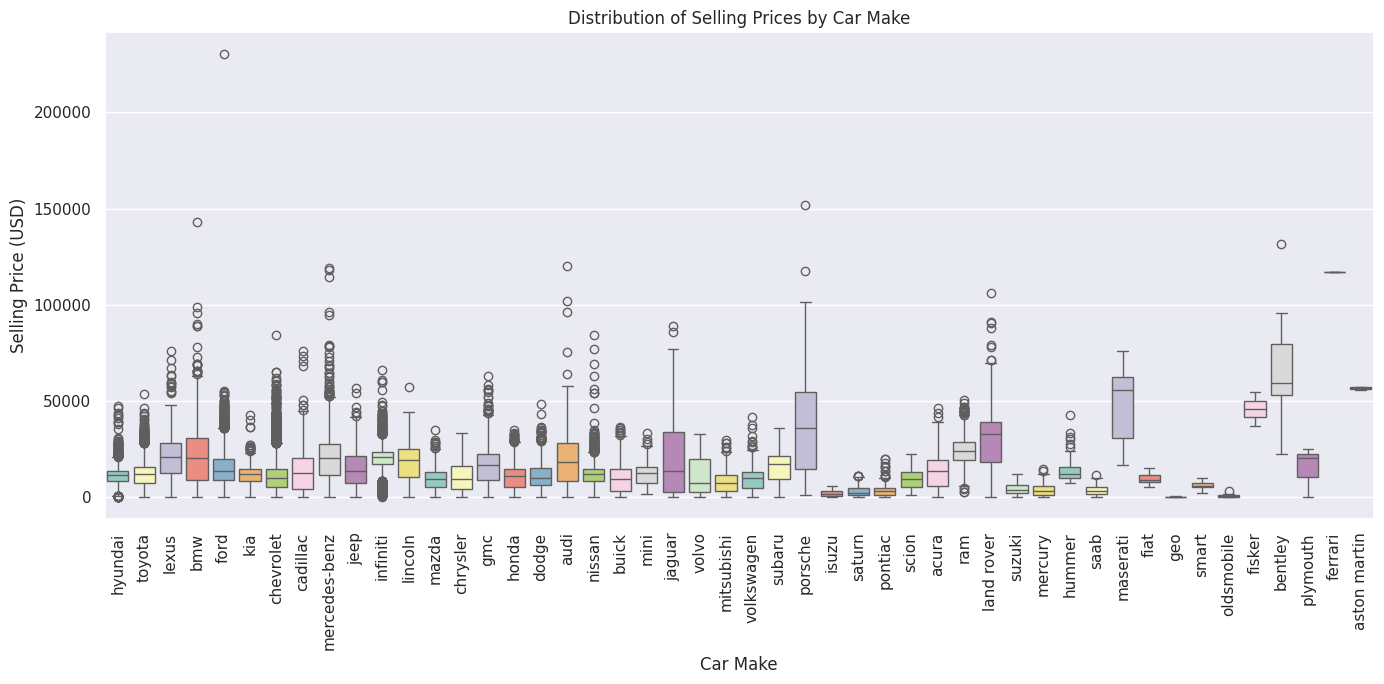

Most expensive makes on average:
make
ferrari         117000.000000
bentley          67781.250000
aston martin     56750.000000
maserati         48450.000000
fisker           45833.333333
Name: sellingprice, dtype: float64
Widest price ranges:
make
ford             229800
porsche          150750
bmw              142700
audi             119650
mercedes-benz    118700
Name: sellingprice, dtype: int64


In [18]:
df['make'] = df['make'].astype(str).str.strip().str.lower()
# Get top 10 most frequent car makes
top_makes = df['make'].value_counts().nlargest(50).index

# Filter the DataFrame to include only those makes
df_top_makes = df[df['make'].isin(top_makes)]
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_top_makes, x='make', y='sellingprice', palette='Set3')
plt.title('Distribution of Selling Prices by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Selling Price (USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
# Calculate price range for each make (max - min)
average_price = df.groupby('make')['sellingprice'].mean().sort_values(ascending=False)
print("Most expensive makes on average:")
print(average_price.head(5))
price_range = df.groupby('make')['sellingprice'].agg(lambda x: x.max() - x.min())
price_range = price_range.sort_values(ascending=False)
print("Widest price ranges:")
print(price_range.head(5))

**Answer for Q3**:

The most expensive car makes on average are:
  1. Ferrari (average: $117,000)

  2. Bentley (average: $67,781)

These are luxury brands and consistently sell for higher prices.  

The car makes with the widest selling price distribution are:
  1. Ford (range: $229,800)
  
  2. Porsche (range: $150,750)

These brands likely include both economy and luxury models, which causes a wide price range.




**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

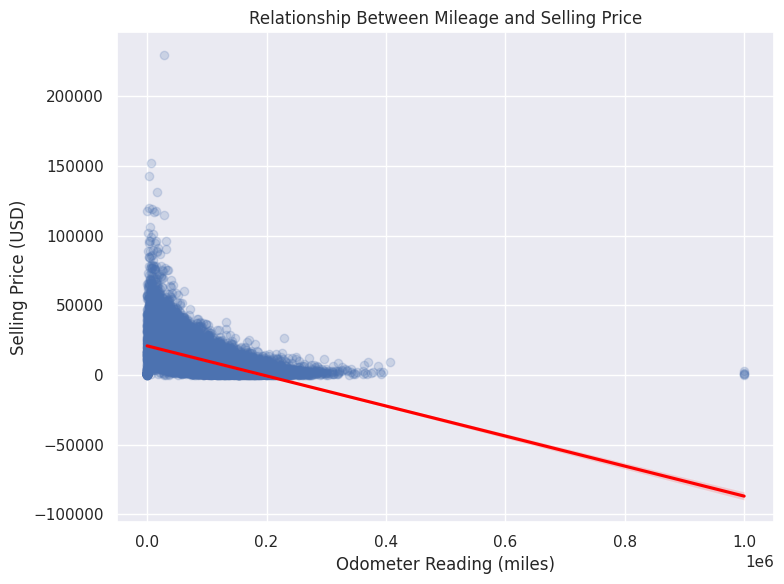

Correlation between odometer and selling price: -0.58


In [7]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='odometer', y='sellingprice', scatter_kws={'alpha':0.2}, line_kws={'color': 'red'})
plt.title('Relationship Between Mileage and Selling Price')
plt.xlabel('Odometer Reading (miles)')
plt.ylabel('Selling Price (USD)')
plt.tight_layout()
plt.show()
correlation = df['odometer'].corr(df['sellingprice'])
print(f'Correlation between odometer and selling price: {correlation:.2f}')

**Answer for Q4**:
The scatter plot with a best fit line shows a clear negative relationship between a car’s odometer reading and its selling price, where the calculated correlation coefficient is -0.58, which indicates a moderate negative correlation.

This means that, as mileage increases, the car's selling price decreases.

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

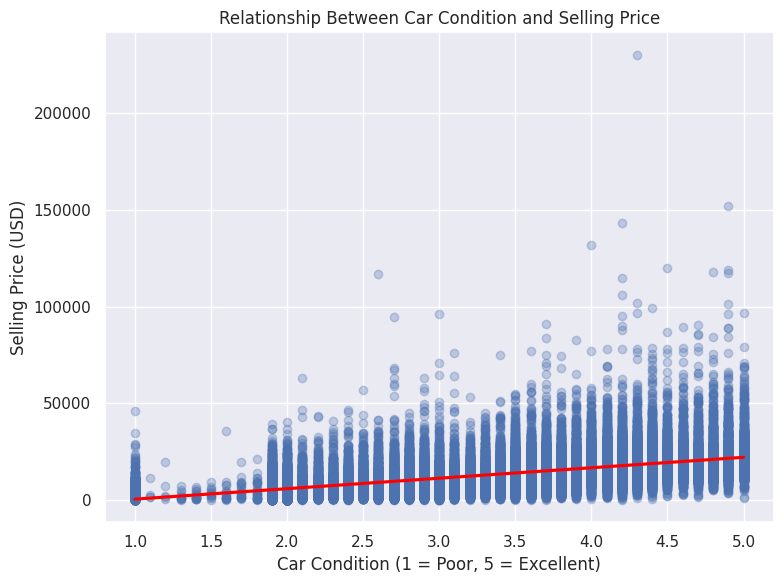

Correlation between condition and selling price: 0.53


In [23]:
df['condition'].unique()
df['condition'].dtype
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='condition', y='sellingprice', scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Relationship Between Car Condition and Selling Price')
plt.xlabel('Car Condition (1 = Poor, 5 = Excellent)')
plt.ylabel('Selling Price (USD)')
plt.tight_layout()
plt.show()
correlation = df['condition'].corr(df['sellingprice'])
print(f"Correlation between condition and selling price: {correlation:.2f}")

**Answer for Q5**:

The regression plot shows a positive correlation between car condition and selling price, where the correlation coefficient is 0.53, indicating moderate positive relationship.

This means cars in better condition tend to sell for more, though other factors also influence price.

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

/tmp/ipython-input-35-294986092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_body.index, y=avg_price_by_body.values, palette='Set2')


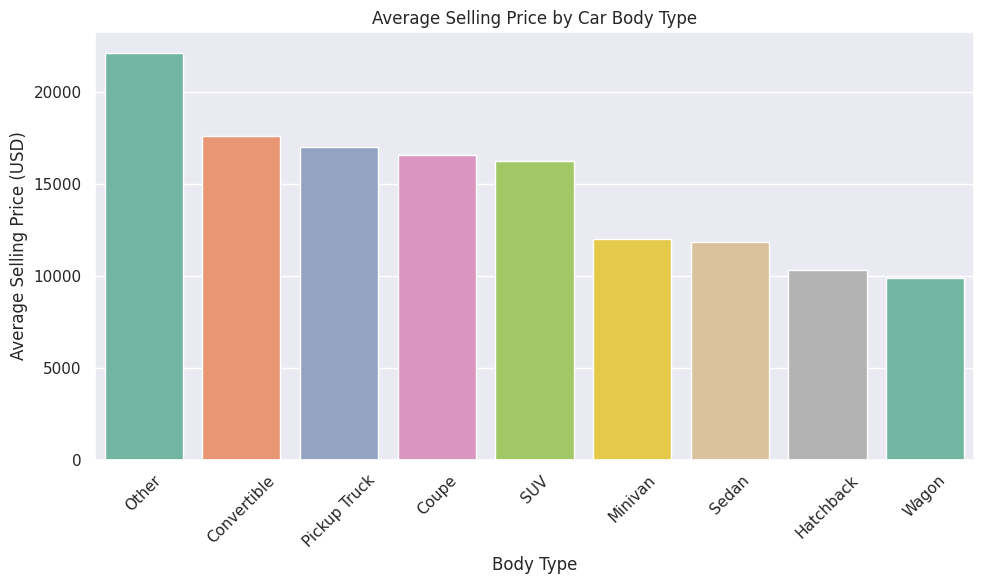

Average selling price by body type:
body_type
Other           22134.12
Convertible     17581.56
Pickup Truck    16985.41
Coupe           16586.99
SUV             16221.94
Minivan         11981.05
Sedan           11861.80
Hatchback       10320.64
Wagon            9872.68
Name: sellingprice, dtype: float64


In [35]:
avg_price_by_body = df.groupby('body_type')['sellingprice'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_body.index, y=avg_price_by_body.values, palette='Set2')
plt.title('Average Selling Price by Car Body Type')
plt.ylabel('Average Selling Price (USD)')
plt.xlabel('Body Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("Average selling price by body type:")
print(avg_price_by_body.round(2))

**Answer for Q6**:

Yes, there are noticeable differences in the average selling price across car body types.

Here is the ranked order of body types by average selling price (from most to least expensive):

1. **Other** – $22,134.12  
2. **Convertible** – $17,581.56  
3. **Pickup Truck** – $16,985.41  
4. **Coupe** – $16,586.99  
5. **SUV** – $16,221.94  
6. **Minivan** – $11,981.05  
7. **Sedan** – $11,861.80  
8. **Hatchback** – $10,320.64  
9. **Wagon** – $9,872.68  

- The **most expensive** body type is **Other**

- The **least expensive** body type is **Wagon**

This suggests that vehicle body style significantly impacts average resale value, with less common or more versatile types typically commanding higher prices.

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [36]:
# Step 1: Make sure 'body_type', 'make', 'model', 'color', 'state', 'transmission' are categorical
categorical_cols = ['make', 'model', 'body_type', 'color', 'state', 'transmission']

# Step 2: One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 3: Drop any remaining irrelevant or non-numeric columns if still present
df_encoded.drop(['body', 'trim', 'vin', 'interior', 'seller', 'saledate'], axis=1, errors='ignore', inplace=True)

# Step 4: Check for any missing values after encoding
print("Missing values after encoding:")
print(df_encoded.isnull().sum().sum())  # Should be 0

# Step 5: Final preview
print("Final dataset shape for modeling:", df_encoded.shape)
df_encoded.head()


Missing values after encoding:
0
Final dataset shape for modeling: (46578, 759)


,year,condition,odometer,sellingprice,make_aston martin,make_audi,make_bentley,make_bmw,make_buick,make_cadillac,...,state_pa,state_pr,state_sc,state_tn,state_tx,state_ut,state_va,state_wa,state_wi,transmission_manual
0,2013,3.9,50404.0,10900,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2014,4.9,17846.0,29900,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2012,4.1,21122.0,24200,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2002,1.9,145303.0,3200,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2014,4.9,6714.0,22100,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## Modelling

_Apply the linear regression model below._

In [37]:
from sklearn.model_selection import train_test_split

# X = all columns except 'sellingprice'
X = df_encoded.drop('sellingprice', axis=1)
y = df_encoded['sellingprice']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict selling prices for test data
y_pred = model.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 16617801.11
R² Score: 0.82


## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

Mean Squared Error (MSE): 16617801.11
R² Score: 0.82


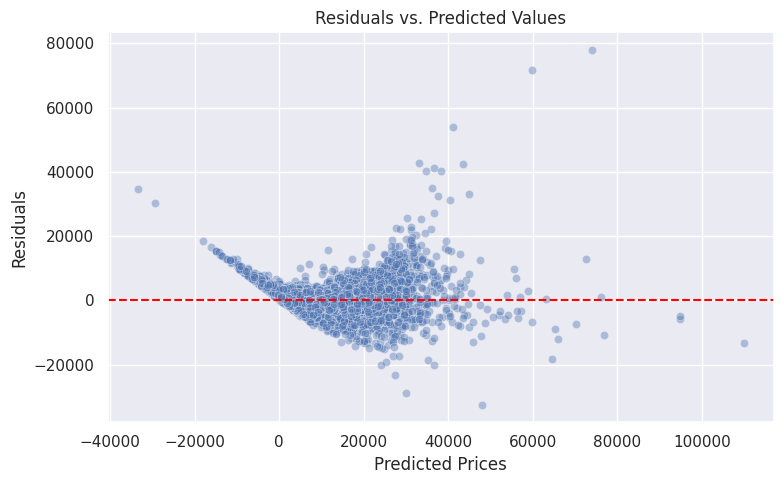

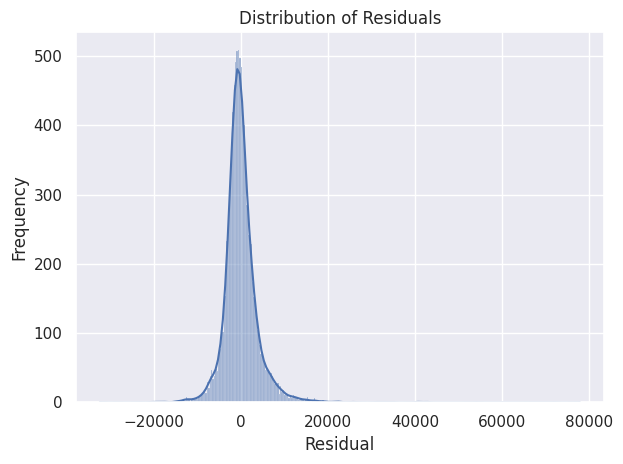

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: your answer here.